# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
 
import os
import json
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import requests
import datetime as dt # to put a datestamp on the outputs
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

"""" Output File (CSV)
Create file name output_data in starter_code for csv file
Create file name Images for saving plots"""
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
""" Print the city count to confirm sufficient count
number of cities change (when i rerun program) because of randonly selection of lat and long
same thing will happen for all cells"""
len(cities)


616

In [3]:
#create url 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create empty lists to store the data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

# Loop through cities
for city in cities:
     # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()
    
    # Start the error handling
    # Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
    
        print(f"City Name: {city}, City ID: {city_id}")
    
    # Print error message and move on to the next city if there is an error
    except:
        
        print("That record does not exist, searching for next record...")

City Name: hamilton, City ID: 4513583
City Name: pisco, City ID: 3932145
City Name: khatanga, City ID: 2022572
City Name: hermanus, City ID: 3366880
City Name: rikitea, City ID: 4030556
City Name: carnarvon, City ID: 2074865
City Name: bambanglipuro, City ID: 1650434
City Name: hobart, City ID: 2163355
City Name: kapaa, City ID: 5848280
City Name: jalingo, City ID: 2336589
City Name: ribeira grande, City ID: 3372707
City Name: bredasdorp, City ID: 1015776
City Name: shihezi, City ID: 1529195
City Name: mar del plata, City ID: 3430863
City Name: punta arenas, City ID: 3874787
City Name: mataura, City ID: 6201424
City Name: chuy, City ID: 3443061
City Name: avarua, City ID: 4035715
City Name: albany, City ID: 5106841
City Name: atuona, City ID: 4020109
City Name: barrow, City ID: 5880054
City Name: ca mau, City ID: 1586443
City Name: goderich, City ID: 5962442
City Name: ivybridge, City ID: 2645988
City Name: udachnyy, City ID: 2014624
City Name: butaritari, City ID: 2110227
City Name: q

That record does not exist, searching for next record...
City Name: querecotillo, City ID: 3693057
City Name: sitka, City ID: 5557293
City Name: meulaboh, City ID: 1214488
City Name: gorontalo, City ID: 1643837
City Name: cidreira, City ID: 3466165
City Name: kualakapuas, City ID: 1639304
City Name: maumere, City ID: 1635815
That record does not exist, searching for next record...
City Name: narsaq, City ID: 3421719
City Name: nelson bay, City ID: 2155562
City Name: tiznit, City ID: 2527087
City Name: ibia, City ID: 3461620
City Name: linjiang, City ID: 2036069
City Name: samarai, City ID: 2132606
City Name: kruisfontein, City ID: 986717
City Name: arraial do cabo, City ID: 3471451
City Name: noumea, City ID: 2139521
City Name: san vicente, City ID: 3428068
City Name: sindor, City ID: 492860
City Name: coihaique, City ID: 3894426
City Name: greytown, City ID: 1000006
That record does not exist, searching for next record...
City Name: saint anthony, City ID: 5044290
City Name: pauini, C

City Name: slawno, City ID: 3085610
City Name: batagay-alyta, City ID: 2027042
City Name: shishou, City ID: 1788268
City Name: huarmey, City ID: 3939168
City Name: caucaia, City ID: 3402429
City Name: disna, City ID: 629055
City Name: boende, City ID: 218680
City Name: shubarkuduk, City ID: 608271
City Name: arman, City ID: 2127060
City Name: mount darwin, City ID: 885800
City Name: bam, City ID: 141736
City Name: adrar, City ID: 2381972
City Name: sayyan, City ID: 70979
City Name: grand forks, City ID: 5059430
That record does not exist, searching for next record...
City Name: ilovlya, City ID: 556961
City Name: andros town, City ID: 3572906
City Name: foumban, City ID: 2231506
City Name: abha, City ID: 110690
City Name: laguna, City ID: 5364271
City Name: brae, City ID: 2654970
City Name: amposta, City ID: 3130131
City Name: ust-kuyga, City ID: 2013921
City Name: synya, City ID: 485215
City Name: rovaniemi, City ID: 638936
That record does not exist, searching for next record...
City

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cities_df = pd.DataFrame({"City ID": city_id_list, "City": city_name_list, 
                          "Country": country_list, "Lat": lat_list, "Lng": lng_list,
                         "Temperature": temp_list, "Humidity": humidity_list, "Clouds": clouds_list,
                         "Wind Speed": wind_speed_list})
cities_df.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,4513583,Hamilton,US,39.1834,-84.5333,54.48,71,90,5.75
1,3932145,Pisco,PE,-13.7000,-76.2167,80.10,51,40,13.80
2,2022572,Khatanga,RU,71.9667,102.5000,-43.89,97,51,10.31
3,3366880,Hermanus,ZA,-34.4187,19.2345,62.01,87,20,1.99
4,4030556,Rikitea,PF,-23.1203,-134.9692,80.31,75,60,10.11


In [5]:
# Export to .csv file
cities_df.to_csv(output_data_file, index_label='City_ID')

In [6]:
#describe function will give basic statistic values
#check the max humidity level for code
cities_df.describe()

,City ID,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
count,5.640000e+02,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,2.557980e+06,20.718351,25.594176,52.294734,72.751773,50.872340,7.520479
std,1.612292e+06,33.646201,90.293845,27.921236,20.750024,38.695119,5.394665
min,4.974700e+04,-54.800000,-179.166700,-43.890000,4.000000,0.000000,0.270000
25%,1.498234e+06,-6.704400,-52.432825,33.852500,63.750000,10.000000,3.440000
50%,2.139038e+06,25.029100,30.948400,60.080000,78.000000,51.500000,6.140000
75%,3.460516e+06,49.238350,104.424975,76.200000,89.000000,90.000000,10.237500
max,1.072286e+07,78.218600,179.316700,91.400000,100.000000,100.000000,33.710000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#max humidity level is 100.

In [8]:
#  Get the indices of cities that have humidity over 100%.
#max humidity level is 100.

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

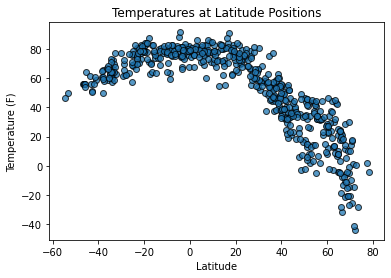

In [10]:
""" refer cities_df data frame  
check unit of variable 
Images is the path way for saving picture ,created before in starter_code folder
plt.savefig should be before plt.show
"""
x_values = cities_df["Lat"]
y_values = cities_df["Temperature"]
plt.scatter(x_values,y_values,alpha=.75, edgecolors="k")
plt.title('Temperatures at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig("Images/lat_temp.png")
plt.show()


Scatter plot shows when latitude is between -20 to +20 temperature is high and when latitude change from  20 to 80 temperature is decreasing.

## Latitude vs. Humidity Plot

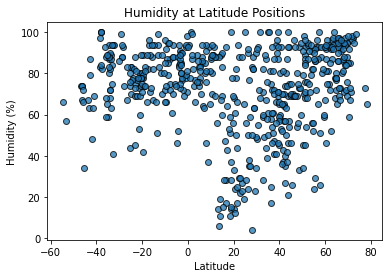

In [11]:
#check unit of variable 
x_values = cities_df["Lat"]
y_values = cities_df["Humidity"]

plt.scatter(x_values,y_values,alpha=.75, edgecolors="k")
plt.title('Humidity at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.savefig("Images/lat_humidity.png")
plt.show()


There is clear correlation between lat and humidity.

## Latitude vs. Cloudiness Plot

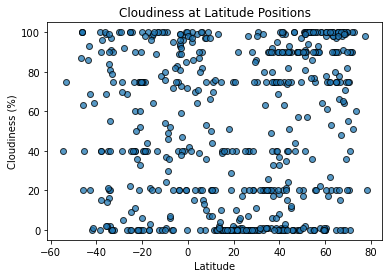

In [12]:
x_values = cities_df["Lat"]
y_values = cities_df["Clouds"]

plt.scatter(x_values,y_values, alpha=.75, edgecolors="k")
plt.title('Cloudiness at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.savefig("Images/lat_clouds.png")
plt.show()

There is clear correlation between lat and clouds.

## Latitude vs. Wind Speed Plot

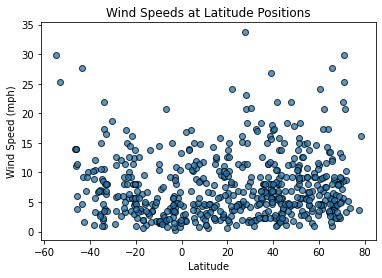

In [13]:
#unit of wind speed mph
x_values = cities_df["Lat"]
y_values = cities_df["Wind Speed"]
plt.scatter(x_values,y_values, alpha=.75, edgecolors="k")
plt.title('Wind Speeds at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.savefig("Images/lat_wind.png")
plt.show()

There is clear correlation between lat and wind speed.

## Linear Regression

In [14]:
"""Create Northern and Southern Hemisphere DataFrames
mask funtion will allows us to sort data depend on lat. since  latitude of equador is zero ,
lat>0 will give data for northern hemisphere
~mask(lat<0)  function will give us southern hemisphere """

mask = cities_df['Lat'] > 0
northern_hemisphere = cities_df[mask]
southern_hemisphere = cities_df[~mask]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

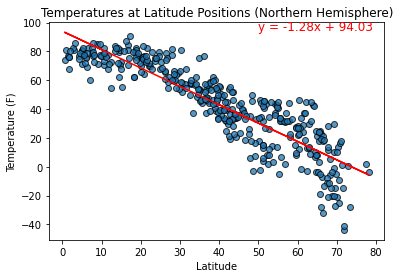

-0.8891580802157284


In [15]:
#create the linear regression  and check the spot for formula and units for label if applicable 
#use str for any rounding 
#similar codes  homework 5 
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, alpha=.75, edgecolors="k")
plt.title('Temperatures at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,95),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')


plt.savefig("Images/lat_temp_north.png")
plt.show()
print(rvalue)

r=-08889 that means there is strong correlation between temperature and latitude.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

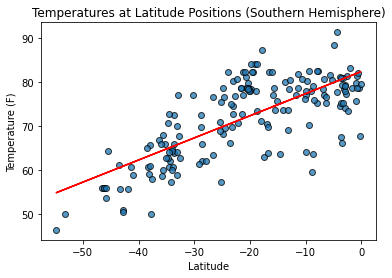

0.7392380955472072


In [16]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values, alpha=.75, edgecolors="k")
plt.title('Temperatures at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
#for annotation look at the scatter plot and choose the best coordinate(x,y) for clear visualization 
plt.annotate(line_eq,(-50,95),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

plt.savefig("Images/lat_temp_south.png")
plt.show()
print(rvalue)

r=.638 that means there is moderate  correlation between temperature and latitude.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

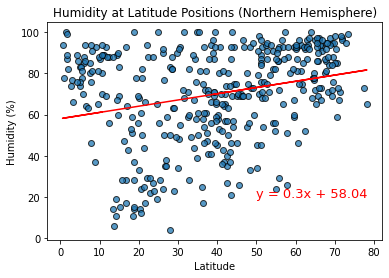

0.26530232217538235


In [17]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, alpha=.75, edgecolors="k")
plt.title('Humidity at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=13,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')


plt.savefig("Images/lat_humidity_north")
plt.show()
print(rvalue)

r=.236 shows there is weak correlation between latitude and humudity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0.17517572778574417


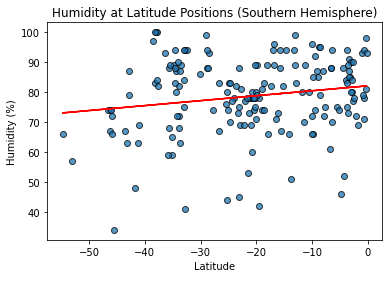

0.17517572778574417


In [18]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(rvalue)

plt.scatter(x_values,y_values, alpha=.75, edgecolors="k")
plt.title('Humidity at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.savefig("Images/lat_humudity_south")
plt.show()
print(rvalue)

r=.271 shows there is weak correlation between latitude and humudity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

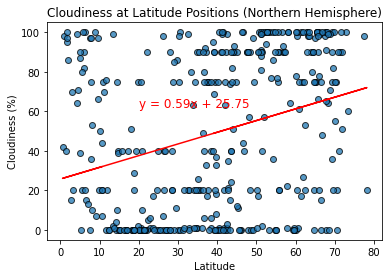

0.30097997782858554


In [19]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values, alpha=.75, edgecolors="k")
plt.title('Cloudiness at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,62),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')


plt.savefig("Images/lat_cloudiness_north")
plt.show()
print(rvalue)

r=.346 shows there is weak correlation between latitude and cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

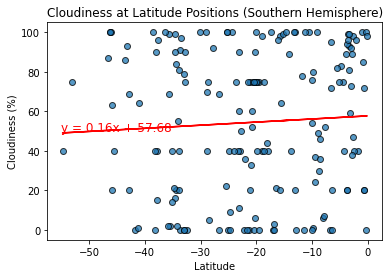

0.05872919111478016


In [20]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, alpha=.75, edgecolors="k")
plt.title('Cloudiness at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,50),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')


plt.savefig("Images/lat_cloudiness_south")
plt.show()
print(rvalue)


r=.153 shows there is weak correlation between latitude and cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

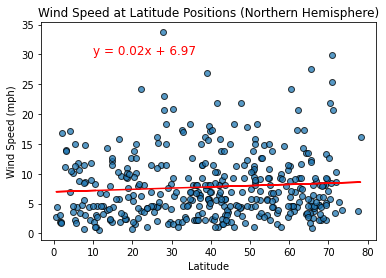

0.07653551507956574


In [21]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values, alpha=.75, edgecolors="k")
plt.title('Wind Speed at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.savefig("Images/lat_windspeed_north")
plt.show()
print(rvalue)


 there is weak correlation between latitude and wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

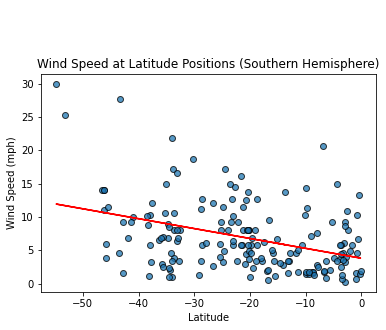

-0.38262925356137806


In [22]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,alpha=.75, edgecolors="k")
plt.title('Wind Speed at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')


plt.savefig("Images/lat_windspeed_south")
plt.show()
print(rvalue)


In [23]:
#all done  